In [11]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import sys

In [12]:
# read in img as rgb, gray, make a copy
img_rgb = cv2.imread('Images/Q1/text.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img = img_gray.copy()
# set method as SSD_normed
method = cv2.TM_SQDIFF_NORMED

In [13]:
# helper function which reads in the template and calls cv2.matchTemplate
# also has an option to return minMaxLoc instead
def do_match(img, template_filename, minMaxLoc=False):
    template = cv2.imread(template_filename, 0)
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img,template,method)
    if minMaxLoc:
        res = cv2.minMaxLoc(res)

    return res, w, h, template

In [14]:
# helper function to find and print the "best" result
def find_best(min_val, min_loc, filename, results, lowest):
    results.append([min_val, min_loc])

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if min_val < results[lowest][0] or lowest == -1:
        lowest = len(results)-1
        print filename

    return results, lowest

In [15]:
# helper function to display the results of the "find_best" function
def print_one_letter_results(results, lowest, img):
    print results[lowest]
    print results[lowest][0]

    top_left = results[lowest][1]

    cv2.rectangle(img, top_left, (top_left[0] + w, top_left[1] + h), (0,0,255), 2)

    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(111),plt.imshow(img,cmap = 'gray')
    plt.show()

Images/Q1/Fonts/Ariel.jpg
Images/Q1/Fonts/PlatinoLinotype.jpg
[0.0006506171775981784, (149, 391)]
0.000650617177598


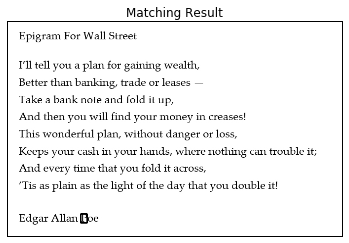

In [16]:
font_path = 'Images/Q1/Fonts'

results = []
lowest = -1

# go through all possible fonts to find the best result
for filename in glob.glob(os.path.join(font_path, '*.jpg')): 
    img2 = img.copy()
    (min_val, max_val, min_loc, max_loc), w, h, template = do_match(img, filename, True)

    results, lowest = find_best(min_val, min_loc, filename, results, lowest)

print_one_letter_results(results,lowest,img2)

Images/Q1/Sizes/10.jpg
Images/Q1/Sizes/11.jpg
Images/Q1/Sizes/14.jpg
[1.3739856967731612e-06, (23, 391)]
1.37398569677e-06


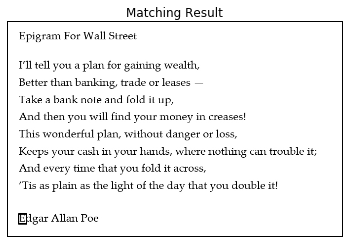

In [17]:
size_path = 'Images/Q1/Sizes'

results = []
lowest = -1

# go through all the possible font sizes to find the best matching result
for filename in glob.glob(os.path.join(size_path, '*.jpg')): 
    img3 = img.copy()
    (min_val, max_val, min_loc, max_loc), w, h, template = do_match(img, filename, True)

    results, lowest = find_best(min_val, min_loc, filename, results, lowest)

print_one_letter_results(results,lowest,img3)

In [22]:
# tried this but couldn't figure out how to map this value to the manually derived thresholds
def getThresh(template):
#     print template
#     print np.shape(template[np.where(template < 255)])
    return np.average(template[np.where(template < 255)])+0

Images/Q1/templates/a_lower.png
Images/Q1/templates/a_upper.png
Images/Q1/templates/t_lower.png
Images/Q1/templates/t_upper.png
[29, 3, 26, 3]


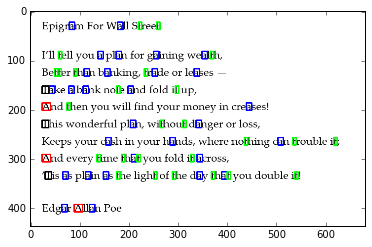

In [27]:
# todo: figure out heuristics to get these manually tuned thresholds
temp_path = 'Images/Q1/templates'

img_rgb_mod = img_rgb.copy()

# establish colors, counts for each template
colors = [(0,0,255), (255,0,0), (0,255,0), (0,0,0)]
counts = [0, 0, 0, 0]
start = 0

# set thresholds for each letter
threshs = [0.06, 0.02, 0.085, 0.02]

# for each template, do match and draw the box around the letter
for filename in glob.glob(os.path.join(temp_path, '*.png')): 
    print filename
    res, w, h, template = do_match(img, filename)
    
    # this isn't actually being used -- an exercise exploring possible threshold factors
    # thresh_calc = getThresh(template)
    
    threshold = threshs[start]
    loc = np.where(res <= threshold)
    
    last_pt = (sys.maxint, sys.maxint)
    for pt in zip(*loc[::-1]):
        if abs(last_pt[0] - pt[0]) > 3 or abs(last_pt[1] - pt[1]) > 3:
            counts[start]+=1
            cv2.rectangle(img_rgb_mod, pt, (pt[0] + w, pt[1] + h), colors[start], 2)
        last_pt = pt
    start+=1

cv2.imwrite('res.png',img_rgb_mod)
plt.imshow(img_rgb_mod)
print counts

(array([185, 185, 255, 255, 289]), array([408, 409, 143, 492, 349]))


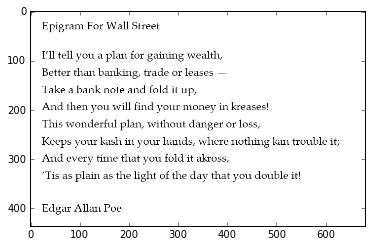

In [28]:
c_path = 'Images/Q1/c.jpg'
k_path = 'Images/Q1/k.jpg'

img_c = img.copy()

# do match, find threshold values and replace pixel values (as the templates are the same size)
res, w, h, template = do_match(img, c_path)

threshold = 0.03
loc = np.where(res <= threshold)
print loc

template_k = cv2.imread(k_path, 0)

last_pt = (sys.maxint, sys.maxint)
for pt in zip(*loc[::-1]):
    if abs(last_pt[0] - pt[0]) > 3 or abs(last_pt[1] - pt[1]) > 3:
        img_c[pt[1]:pt[1]+h, pt[0]:pt[0]+w] = template_k
        last_pt = pt

cv2.imwrite('res_c.png',img_c)
plt.imshow(img_c, cmap='Greys_r')